# Plotting functionality

Here we will have a look at the different options for finetuning `pairplots` and `marginal_plots`.

Lets first draw some samples from the posterior used in a previous tutorial.


In [1]:
import torch
from toy_posterior_for_07_cc import ExamplePosterior

from sbi.analysis import pairplot

posterior = ExamplePosterior()
posterior_samples = posterior.sample((100,))

d:\Programming\sbi\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We will start with the default plot and gradually make it prettier

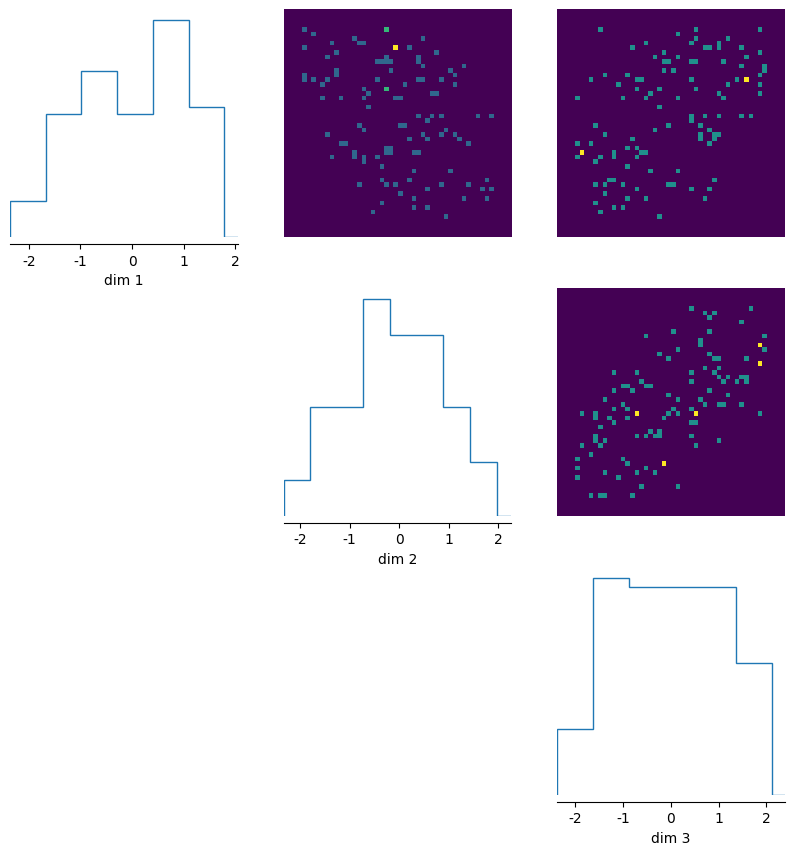

In [2]:
_ = pairplot(
    posterior_samples,
)

## Customisation

The pairplots are split into three regions, the diagonal (`diag`) and the upper and lower off-diagonal regions(`upper` and `lower`). We can pass separate arguments (e.g. `hist`, `kde`, `scatter`) for each region, as well as corresponding style keywords in a dictionary (by using e.g. `upper_kwargs`). For overall figure stylisation one can use `fig_kwargs`.

To get a closer look at the potential options, have a look at the `_get_default_fig_kwargs`, `_get_default_diag_kwargs` and `_get_default_offdiag_kwargs` functions in [analysis/plot.py](https://github.com/sbi-dev/sbi/blob/961-pairplot/sbi/analysis/plot.py).

As illustrated below, we can directly use any `matplotlib` keywords (such as `cmap` for images) by passing them in the `mpl_kwargs` entry of `upper_kwargs` or `diag_kwargs`.


Let's now make a scatter plot for the upper diagonal, a histogram for the diagonal, and pass keyword dictionaries for both.

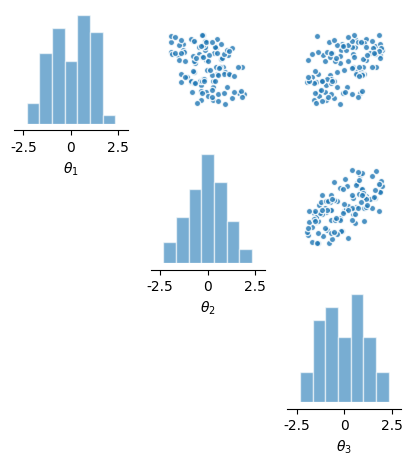

In [3]:
from sbi.analysis.plotting_classes import HistDiagOptions, ScatterOffDiagOptions

_ = pairplot(
    posterior_samples,
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag="hist",
    upper="scatter",
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "color": 'tab:blue',
            "histtype": "bar",
            "bins": 10,
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "fill": True,
        }
    ),
    upper_kwargs=ScatterOffDiagOptions(mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8}),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
)

### Compare two sets of samples

By passing a list of samples, we can plot two sets of samples on top of each other.

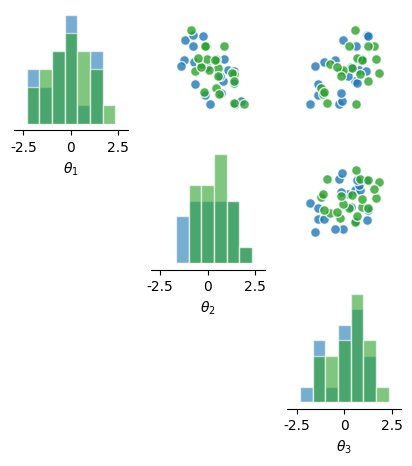

In [4]:
# draw two different subsets of samples to plot
posterior_samples1 = posterior.sample((20,))
posterior_samples2 = posterior.sample((20,))

_ = pairplot(
    [posterior_samples1, posterior_samples2],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag=["hist", "hist"],
    upper=["scatter", "scatter"],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    upper_kwargs=ScatterOffDiagOptions(mpl_kwargs={"s": 50, "alpha": 0.8}),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
)

### Multi-layered plots

We can use the same functionality to make a multi-layered plot using the same set of samples, e.g. a kernel-density estimate on top of a scatter plot.

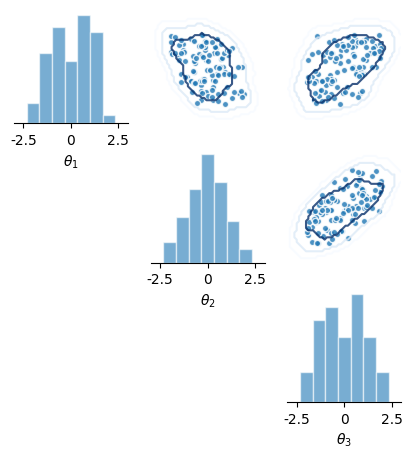

In [10]:
from sbi.analysis.plotting_classes import Despine, FigOptions

_ = pairplot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag=["hist", None],
    upper=["scatter", "contour"],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs= {
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        },
    ),
    upper_kwargs=[
        ScatterOffDiagOptions(
            mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8},
        ),
        ScatterOffDiagOptions(mpl_kwargs={"cmap": 'Blues_r', "alpha": 0.8, "colors": None}),
    ],
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    fig_kwargs=FigOptions(despine=Despine(offset=0)),
)

### Lower diagonal

We can add something in the lower off-diagonal as well.

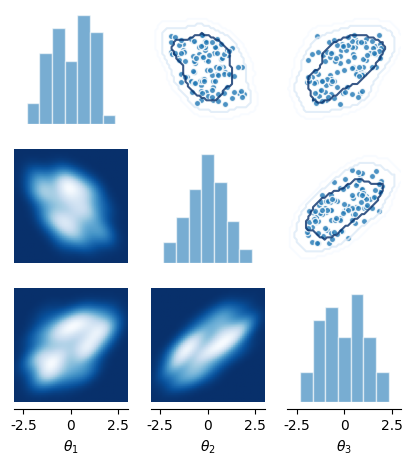

In [6]:
from sbi.analysis.plotting_classes import KdeOffDiagOptions

_ = pairplot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag=["hist", None],
    upper=["scatter", "contour"],
    lower=["kde", None],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    upper_kwargs=[
        ScatterOffDiagOptions(mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8}),
        ScatterOffDiagOptions(mpl_kwargs={"cmap": 'Blues_r', "alpha": 0.8, "colors": None}),
    ],
    lower_kwargs=KdeOffDiagOptions(mpl_kwargs={"cmap": "Blues_r"}),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
)

### Adding observed data

We can also add points, e.g., our observed data $\theta_o$ to the plot.

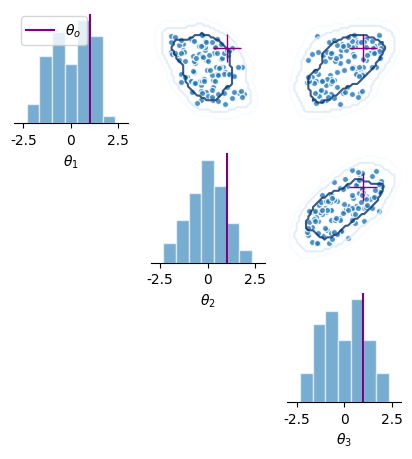

In [7]:
# fake observed data:
from sbi.analysis.plotting_classes import PointsOffDiag

theta_o = torch.ones(1, 3)

_ = pairplot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    diag=["hist", None],
    upper=["scatter", "contour"],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    upper_kwargs=[
        ScatterOffDiagOptions(mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8}),
        ScatterOffDiagOptions(mpl_kwargs={"cmap": 'Blues_r', "alpha": 0.8, "colors": None}),
    ],
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=theta_o,
    fig_kwargs=FigOptions(
        points_labels=[r"$\theta_o$"],
        legend=True,
        points_colors=["purple"],
        points_offdiag=PointsOffDiag(marker="+", markersize=20),
        despine=Despine(offset=0),
    ),
)

### Subsetting the plot

For high-dimensional posteriors, we might only want to visualise a subset of the marginals. This can be done by passing a list of entries to plot to the `subset` argument of the `pairplot` function.

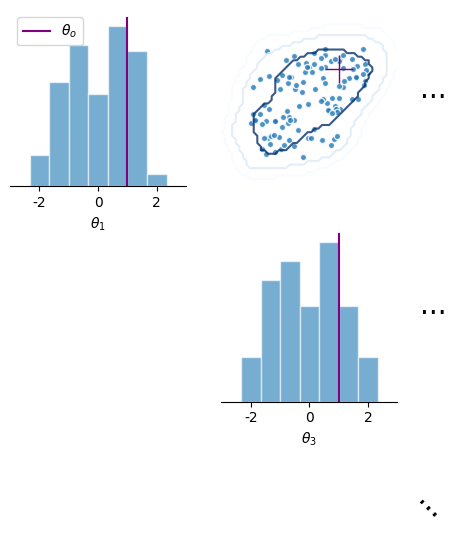

In [8]:
_ = pairplot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    figsize=(5, 5),
    subset=[0, 2],
    diag=["hist", None],
    upper=["scatter", "contour"],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    upper_kwargs=[
        ScatterOffDiagOptions(mpl_kwargs={"color": 'tab:blue', "s": 20, "alpha": 0.8}),
        ScatterOffDiagOptions(mpl_kwargs={"cmap": 'Blues_r', "alpha": 0.8, "colors": None}),
    ],
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=theta_o,
    fig_kwargs=FigOptions(
        points_labels=[r"$\theta_o$"],
        legend=True,
        points_colors=["purple"],
        points_offdiag=PointsOffDiag(marker="+", markersize=20),
        despine=Despine(offset=0),
    ),
)

### Plot just the marginals

1D Marginals can also be visualised using the `marginal_plot` function

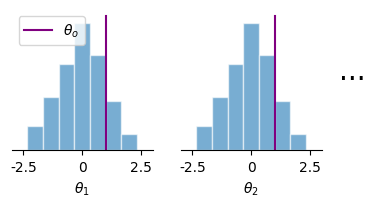

In [9]:
from sbi.analysis import marginal_plot

# plot posterior samples
_ = marginal_plot(
    [posterior_samples, posterior_samples],
    limits=[[-3, 3] * 3],
    subset=[0, 1],
    diag=["hist", None],
    diag_kwargs=HistDiagOptions(
        mpl_kwargs={
            "bins": 10,
            "color": 'tab:blue',
            "edgecolor": 'white',
            "linewidth": 1,
            "alpha": 0.6,
            "histtype": "bar",
            "fill": True,
        }
    ),
    labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"],
    points=[torch.ones(1, 3)],
    figsize=(4, 2),
    fig_kwargs=FigOptions(
        points_labels=[r"$\theta_o$"],
        legend=True,
        points_colors=["purple"],
        points_offdiag=PointsOffDiag(marker="+", markersize=20),
        despine=Despine(offset=0),
    ),
)